# Grade: 100 points

# Assignment 01: Traditional Machine Learning 

## Instructions

#### Follow These Steps before submitting your assignment 

This notebook contains the questions for Assignment 1. 

You must upload this completed Jupyter Notebook file as your submission (other file types are not permitted and will result in a grade of 0).***

* If you have trouble running neural network models on your laptop, you can use online platforms, like **[Google Colab](https://colab.research.google.com/)**.
* All Figures should have a x- and y-axis label and an appropriate title.
**Ensure that your code runs correctly by choosing "Kernel -> Restart and Cell -> Run All" before submitting.**

# Datasets:

`Dataset1.csv` lists the housing market data, where the goal is to predict house prices based on various factors:

- SqFt: Square footage of the house
- Bedrooms: Number of bedrooms
- Bathrooms: Number of bathrooms
- Dist_Center: Distance to city center (in miles)
- House_Age: Age of the house (years)
- Floors: Number of floors
- Lot_Size: Lot size (square feet)
- Walk_Score: Walkability score (0-100)
- HOA_Fee: Monthly HOA fee (if applicable)
- Crime_Rate: Local crime rate (incidents per 1000 residents)
- Dist_School: Distance to the nearest school (miles)
- Grocery_Stores: Number of nearby grocery stores
- Prop_Tax: Property tax rate (%)
- Maint_Cost: Numerical	Yearly maintenance costs 
- Median_Income: Household income of the neighborhood (median)
- Region: Region (values: 'A', 'B', 'C', 'D', 'E')
- House_Cond: House condition ('Low', 'Medium', 'High')
- Urban_Rural: Urban/Rural location ('Urban', 'Rural')
- House_Price: House price (Target variable)


-----------------------------------------------------------------------------------------------------


`Dataset2.csv` is a loan status dataset to predict whether a loan application will be fully approved, conditionally approved, or rejected based on various factors:

- Credit_Score: Applicant's credit score (300-850, higher is better)
- Income: Monthly income
- Loan_Amount: Requested loan amount 
- Loan_Term: Duration of loan (in months)
- Debt_Income: Debt-to-income ratio (%)
- Open_Accounts: Number of active credit accounts
- Hist_Length: Credit history length (years)
- Delinquencies: Number of past missed payments
- Total_Loan_Balance: Total outstanding loan balance
- Credit_Inquiries: Number of recent hard credit inquiries
- Employer_Tenure: How long the applicant has been at their job (years)
- LTV_Ratio: Loan-to-value ratio (%)
- Loan_Purpose: Purpose of the loan (X, Y, Z)
- Employment_Type: Employer size (Small, Medium, Large)
- Loan_Status: Target Variable(0 is Loan Rejected, 1 is Conditionally Approved, 2 is Fully Approved)

In [376]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Perceptron, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, roc_curve, roc_auc_score, log_loss

import time

from sklearn.preprocessing import label_binarize

from sklearn.neural_network import MLPClassifier


# Q1 - Data Loading and Exploration (5 pts)

1. Load the Dataset1.
2. Display basic statistics and inspect for missing data.
3. Encode the categorical features (one-hot encoding). 
4. Visualize the distribution of all features using histogram.
5. **Discussion Question:** Why is it important to explore and visualize the data before building any models? What types of trends or problems could you uncover at this stage?

In [377]:
# 1. Load the Dataset1
data = pd.read_csv('Dataset1.csv')
df = pd.DataFrame(data)

# 2. Display basic statistics
df.head()

,SqFt,Bedrooms,Bathrooms,Dist_Center,House_Age,Floors,Lot_Size,Walk_Score,HOA_Fee,Crime_Rate,Dist_School,Grocery_Stores,Prop_Tax,Maint_Cost,Median_Income,Region,House_Cond,Urban_Rural,House_Price
0,1460,3,4,3.0,45,3,18675,44,59.95,106,5.4,16,1.87,9503.13,74679,D,Low,Rural,495656.84
1,5990,6,2,3.1,67,1,9720,77,455.76,54,5.2,17,0.93,6996.62,180344,D,Low,Rural,1402403.89
2,5826,6,4,34.8,24,2,11172,80,498.98,13,2.7,10,1.61,9591.79,127654,A,Low,Urban,1259101.40
3,5791,2,4,23.2,50,2,15457,11,90.30,12,9.4,18,1.73,8706.57,134169,D,High,Urban,1176431.38
4,4372,2,3,11.7,12,3,3939,92,19.22,83,4.6,12,4.90,3734.43,55109,E,Low,Rural,815844.37


In [378]:
df.describe()

,SqFt,Bedrooms,Bathrooms,Dist_Center,House_Age,Floors,Lot_Size,Walk_Score,HOA_Fee,Crime_Rate,Dist_School,Grocery_Stores,Prop_Tax,Maint_Cost,Median_Income,House_Price
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,3340.252000,3.542500,2.509500,24.960750,59.318500,1.982000,10576.643500,49.632500,251.260920,75.393500,5.067100,14.934500,2.731465,5295.728405,108989.590500,7.543264e+05
std,1546.061995,1.699599,1.122738,14.250363,34.693023,0.828866,5563.645272,28.629867,143.343085,43.229412,2.852952,8.302751,1.303792,2761.979661,52350.927988,2.618632e+05
min,601.000000,1.000000,1.000000,0.500000,0.000000,1.000000,1015.000000,0.000000,0.060000,0.000000,0.100000,1.000000,0.500000,509.170000,20046.000000,1.155764e+05
25%,1985.500000,2.000000,1.000000,12.700000,28.750000,1.000000,5759.750000,24.750000,130.185000,39.750000,2.600000,8.000000,1.600000,2918.257500,63571.500000,5.532796e+05
50%,3382.500000,4.000000,3.000000,24.500000,60.000000,2.000000,10478.500000,49.000000,254.275000,75.000000,5.150000,15.000000,2.710000,5313.155000,109398.500000,7.638495e+05
75%,4665.500000,5.000000,4.000000,37.100000,89.000000,3.000000,15633.500000,75.000000,375.720000,112.000000,7.500000,22.000000,3.860000,7753.977500,155878.250000,9.538061e+05
max,5999.000000,6.000000,4.000000,50.000000,119.000000,3.000000,19996.000000,99.000000,499.550000,149.000000,10.000000,29.000000,5.000000,9995.090000,199976.000000,1.411310e+06


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SqFt            2000 non-null   int64  
 1   Bedrooms        2000 non-null   int64  
 2   Bathrooms       2000 non-null   int64  
 3   Dist_Center     2000 non-null   float64
 4   House_Age       2000 non-null   int64  
 5   Floors          2000 non-null   int64  
 6   Lot_Size        2000 non-null   int64  
 7   Walk_Score      2000 non-null   int64  
 8   HOA_Fee         2000 non-null   float64
 9   Crime_Rate      2000 non-null   int64  
 10  Dist_School     2000 non-null   float64
 11  Grocery_Stores  2000 non-null   int64  
 12  Prop_Tax        2000 non-null   float64
 13  Maint_Cost      2000 non-null   float64
 14  Median_Income   2000 non-null   int64  
 15  Region          2000 non-null   object 
 16  House_Cond      2000 non-null   object 
 17  Urban_Rural     2000 non-null   o

In [380]:
# 2. inspect for missing data
df.isnull().sum()

SqFt              0
Bedrooms          0
Bathrooms         0
Dist_Center       0
House_Age         0
Floors            0
Lot_Size          0
Walk_Score        0
HOA_Fee           0
Crime_Rate        0
Dist_School       0
Grocery_Stores    0
Prop_Tax          0
Maint_Cost        0
Median_Income     0
Region            0
House_Cond        0
Urban_Rural       0
House_Price       0
dtype: int64

In [381]:
# 3. Encode the categorical features (one-hot encoding)
categorical_cols = ['Region', 'House_Cond', 'Urban_Rural']
encoder = OneHotEncoder(sparse_output=False)

encoded_array = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and merge
df_encoded = df.drop(columns=categorical_cols).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SqFt               2000 non-null   int64  
 1   Bedrooms           2000 non-null   int64  
 2   Bathrooms          2000 non-null   int64  
 3   Dist_Center        2000 non-null   float64
 4   House_Age          2000 non-null   int64  
 5   Floors             2000 non-null   int64  
 6   Lot_Size           2000 non-null   int64  
 7   Walk_Score         2000 non-null   int64  
 8   HOA_Fee            2000 non-null   float64
 9   Crime_Rate         2000 non-null   int64  
 10  Dist_School        2000 non-null   float64
 11  Grocery_Stores     2000 non-null   int64  
 12  Prop_Tax           2000 non-null   float64
 13  Maint_Cost         2000 non-null   float64
 14  Median_Income      2000 non-null   int64  
 15  House_Price        2000 non-null   float64
 16  Region_A           2000 

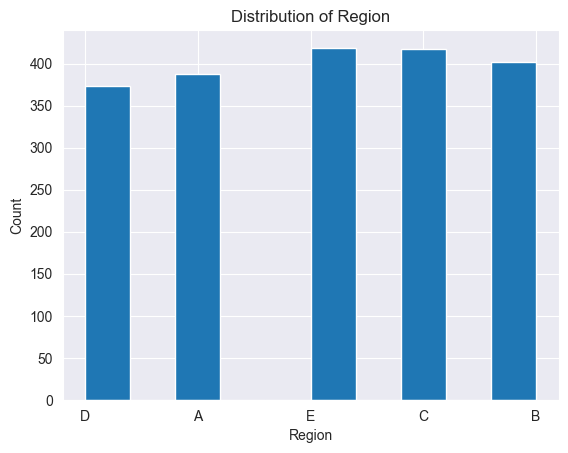

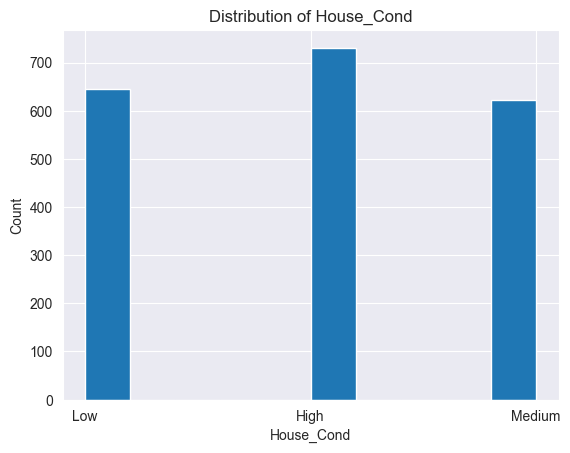

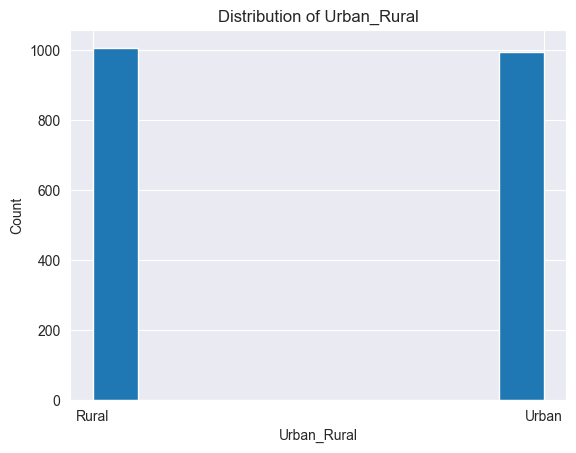

In [382]:
# 4. Visualize the distribution of all features using histogram.

# Categorical Features
# for column in categorical_cols:
#     plt.hist(df[column])
#     plt.title(f"Distribution of {column}")
#     plt.xlabel(column)
#     plt.ylabel("Count")
#     plt.show()
    
def plot_histograms(df, columns):
    for column in columns:
        plt.hist(df[column])
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.show()

plot_histograms(df, categorical_cols)

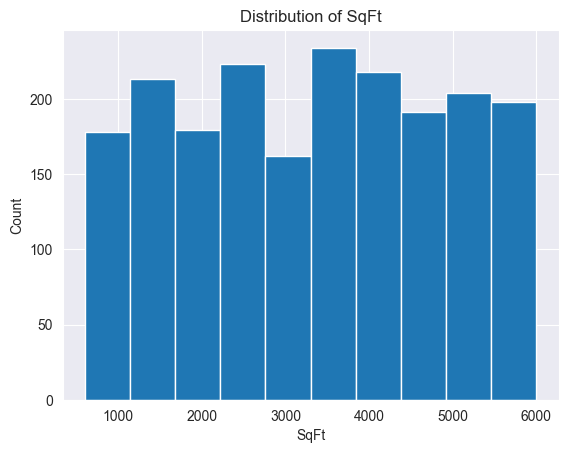

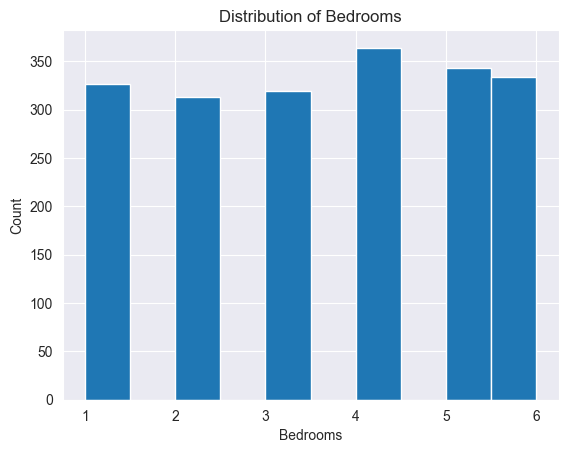

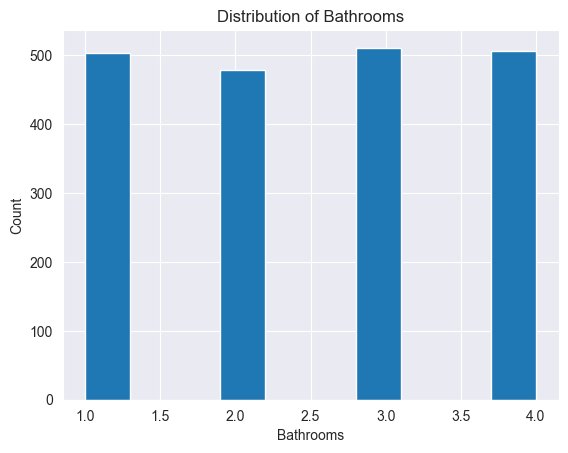

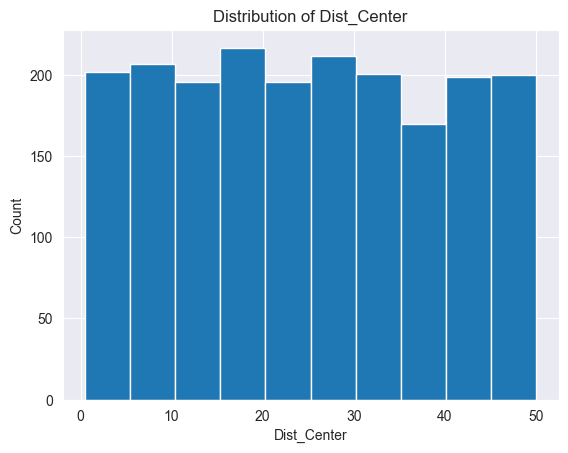

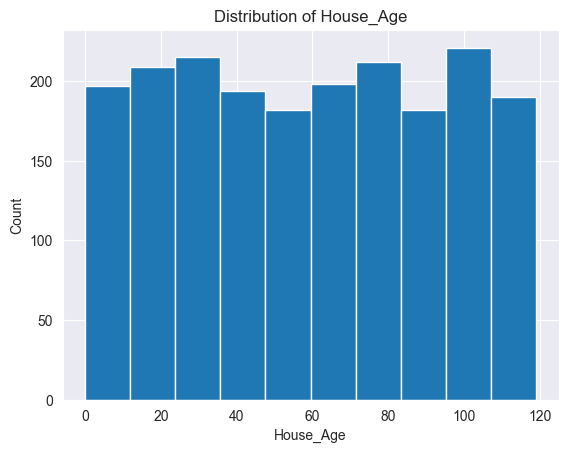

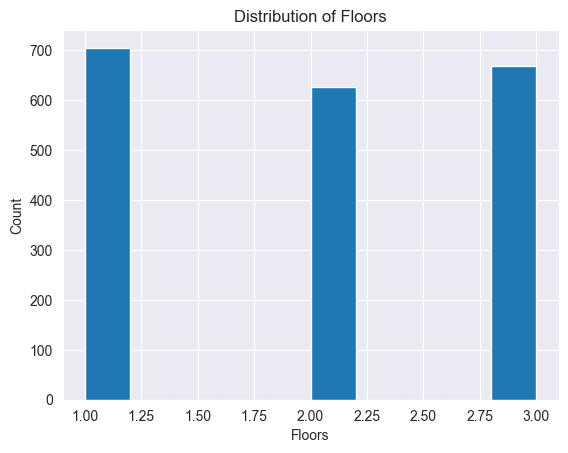

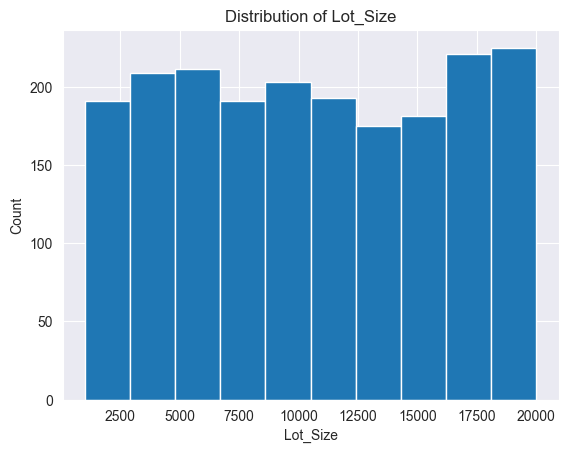

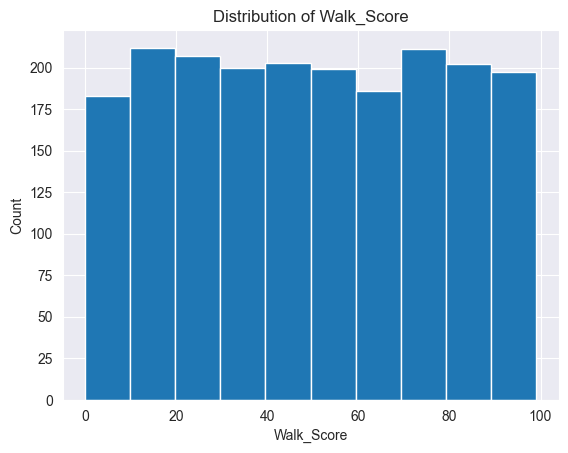

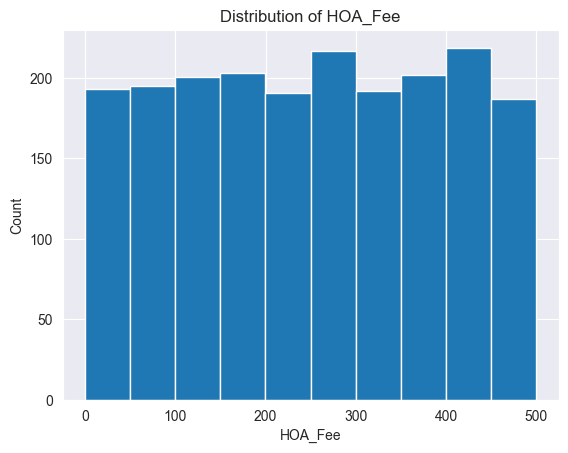

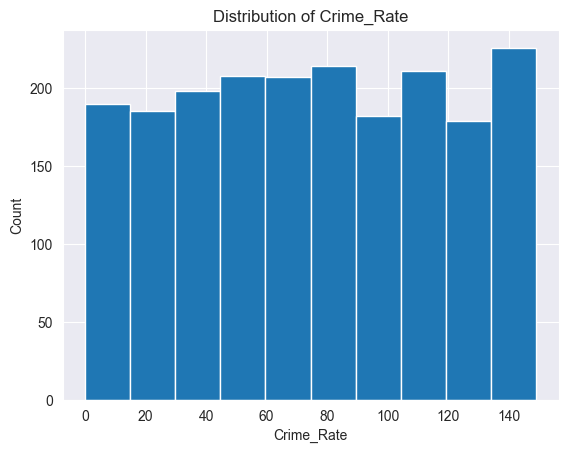

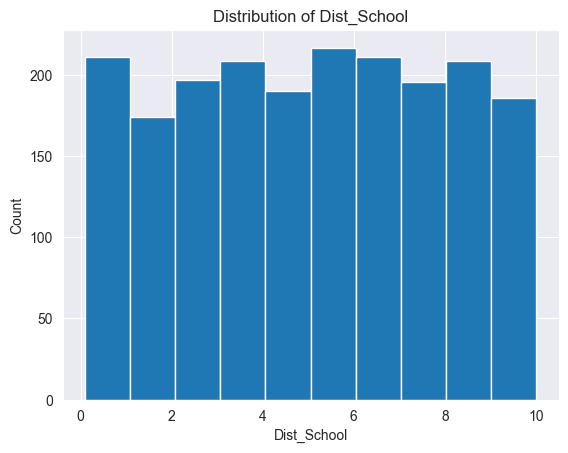

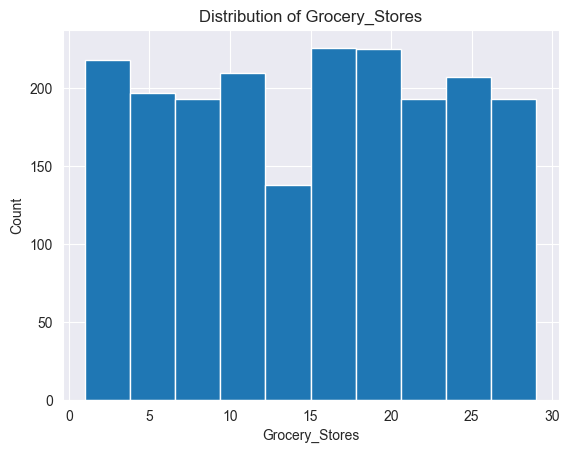

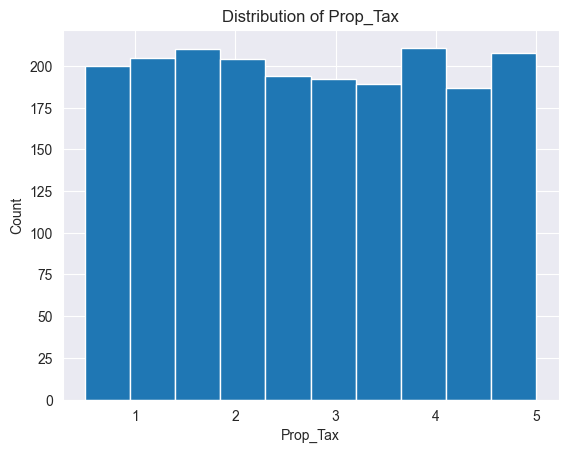

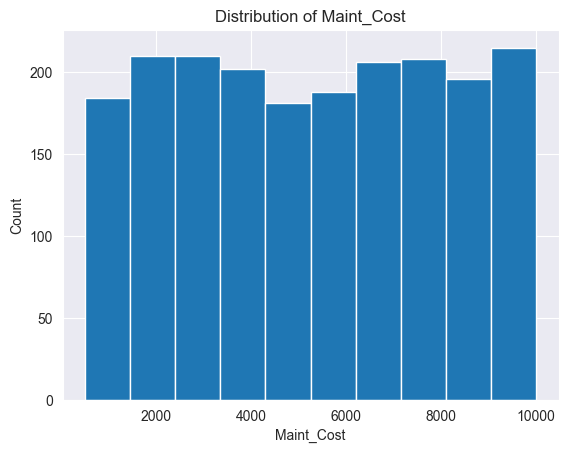

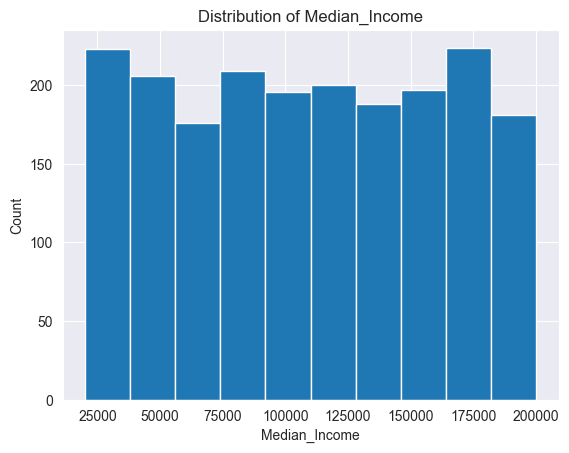

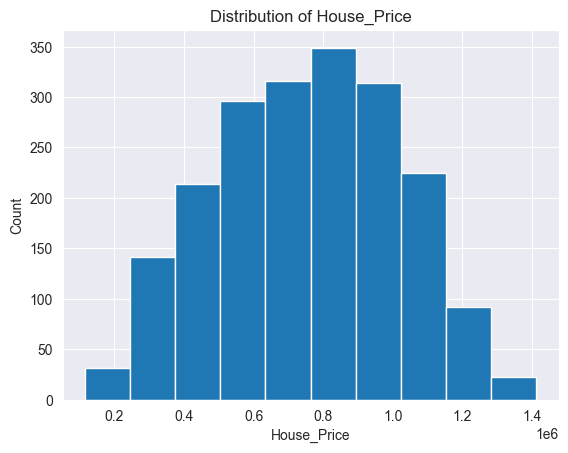

In [383]:
# Numerical Features
numerical_cols = [column for column in df.columns if column not in categorical_cols]

# for column in numerical_cols:
#     plt.hist(df_encoded[column])
#     plt.title(f"Distribution of {column}")
#     plt.xlabel(column)
#     plt.ylabel("Count")
#     plt.show()

plot_histograms(df, numerical_cols)

**Answer to Discussion Question**: 
1. Detect missing values, outliers in the dataset, so we can conduct proper data cleaning.
2. Show feature distributions and feature types in the dataset, so we can conduct proper feature engineering.
3. Also, we can predict what models will work for the dataset.

# Q2 - Outlier Detection (10 pts)
1. Train a Gaussian Mixture Model (GMM) on Dataset1 to identify potential outliers.

2. Remove the detected outliers and save the cleaned dataset.

3. How many outliers you detected?

4. Visualize the histogram plot of the remaining data.

5. **Discussion Question**: What are outliers? and why it is important to detect them?

In [384]:
# 1. Train a Gaussian Mixture Model (GMM) on Dataset1 to identify potential outliers.
n_components_range = range(1, 31)
bic_scores = []
aic_scores = []

# Exclude the target column (House_Price) from the feature set
X = df_encoded.drop(columns=["House_Price"])

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))
    aic_scores.append(gmm.aic(X))
    
# Find the number of components that give the minimum BIC and AIC
best_n_bic = n_components_range[np.argmin(bic_scores)]
best_n_aic = n_components_range[np.argmin(aic_scores)]
best_bic_score = min(bic_scores)
best_aic_score = min(aic_scores)

print(f"Best n_components according to BIC: {best_n_bic}, BIC Score: {best_bic_score}")
print(f"Best n_components according to AIC: {best_n_aic}, AIC Score: {best_aic_score}")

Best n_components according to BIC: 16, BIC Score: 188060.3290527318
Best n_components according to AIC: 16, AIC Score: 156611.261742403


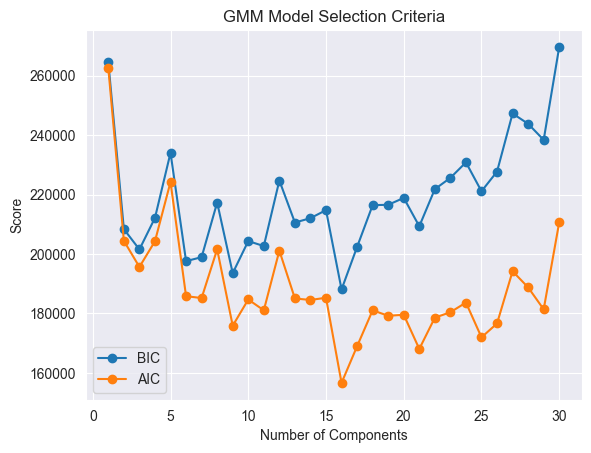

In [385]:
# Plot the BIC and AIC scores
plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
plt.plot(n_components_range, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('GMM Model Selection Criteria')
plt.legend()
plt.show()

In [386]:
gmm = GaussianMixture(n_components=16, random_state=42)
gmm.fit(X)

# Identify potential outliers
# Calculate the log likelihood of each sample under the GMM
log_likelihood = gmm.score_samples(X)
threshold = np.percentile(log_likelihood, 1)
outlier_mask = log_likelihood < threshold

outliers = df_encoded[outlier_mask]
print("Outlier rows:")
print(outliers)

Outlier rows:
      SqFt  Bedrooms  Bathrooms  Dist_Center  House_Age  Floors  Lot_Size  \
38    2128         3          3         48.6        117       3     15633   
129   5716         1          1          8.4         32       3      4880   
228   5336         1          3         48.9         62       1      2618   
251   4591         6          2         49.6         14       3     16611   
366   2582         4          4         43.7         11       2      5746   
619    733         1          4          5.3         22       1      4259   
625   5868         3          3         46.2        119       1      4527   
778   1499         6          1         20.0          6       2     19013   
792   5724         1          2         10.3        107       2      1510   
982   2792         1          1          5.8         48       1      1815   
999   1854         6          3         47.8          3       1      2164   
1027  2555         1          4          4.8        105       

In [387]:
# 2. Remove the detected outliers and save the cleaned dataset.
df_cleaned = df_encoded.loc[~outlier_mask].reset_index(drop=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SqFt               1980 non-null   int64  
 1   Bedrooms           1980 non-null   int64  
 2   Bathrooms          1980 non-null   int64  
 3   Dist_Center        1980 non-null   float64
 4   House_Age          1980 non-null   int64  
 5   Floors             1980 non-null   int64  
 6   Lot_Size           1980 non-null   int64  
 7   Walk_Score         1980 non-null   int64  
 8   HOA_Fee            1980 non-null   float64
 9   Crime_Rate         1980 non-null   int64  
 10  Dist_School        1980 non-null   float64
 11  Grocery_Stores     1980 non-null   int64  
 12  Prop_Tax           1980 non-null   float64
 13  Maint_Cost         1980 non-null   float64
 14  Median_Income      1980 non-null   int64  
 15  House_Price        1980 non-null   float64
 16  Region_A           1980 

In [388]:
# 3. How many outliers you detected?
num_outliers = np.sum(outlier_mask)
print("Number of outliers detected:", num_outliers)

Number of outliers detected: 20


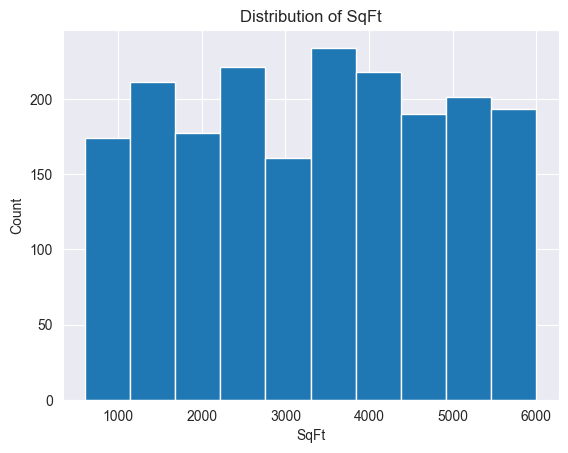

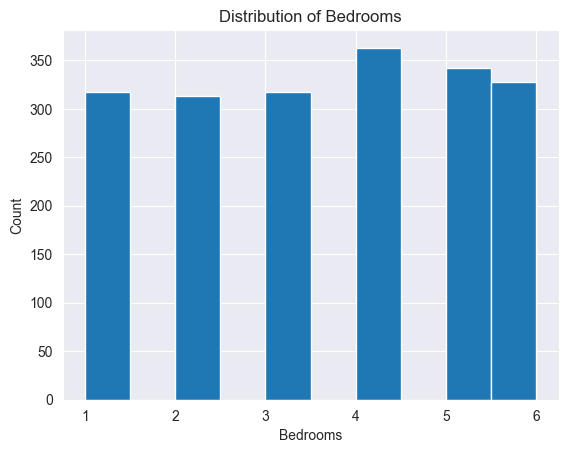

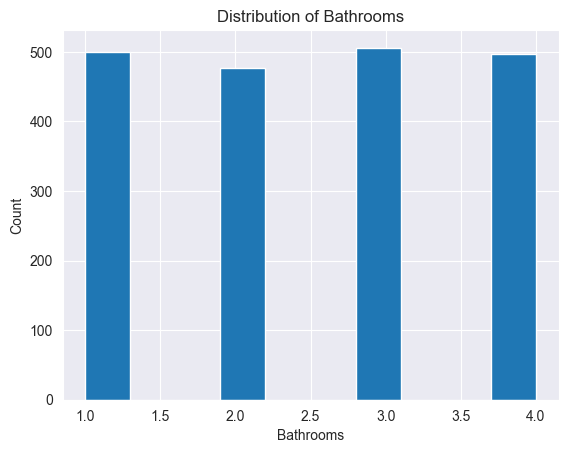

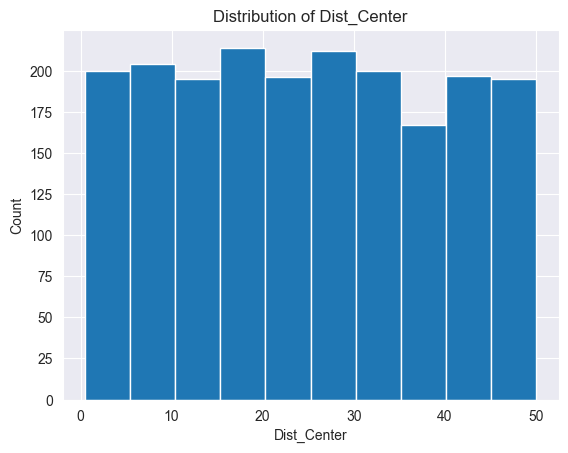

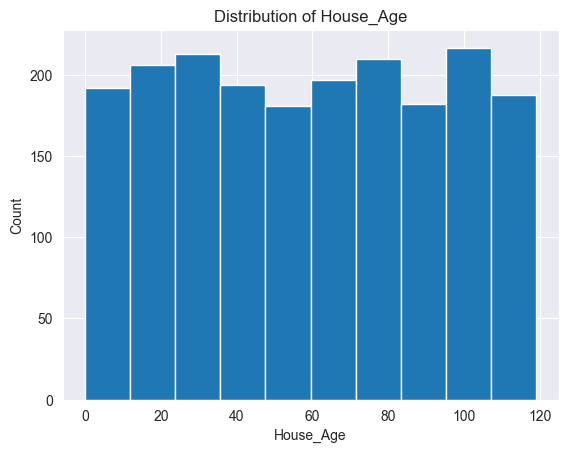

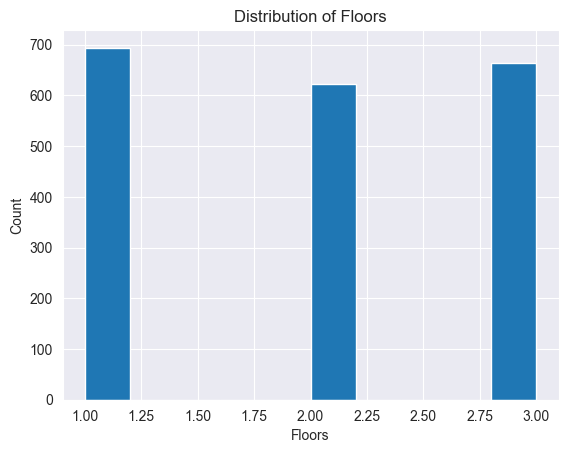

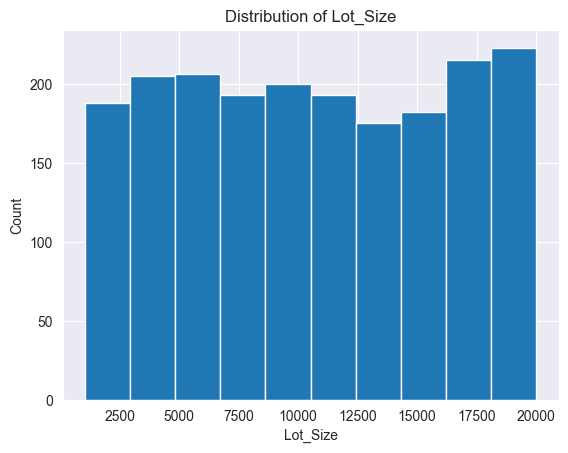

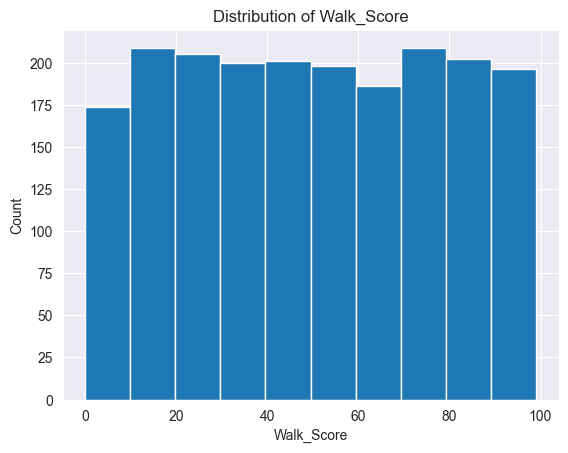

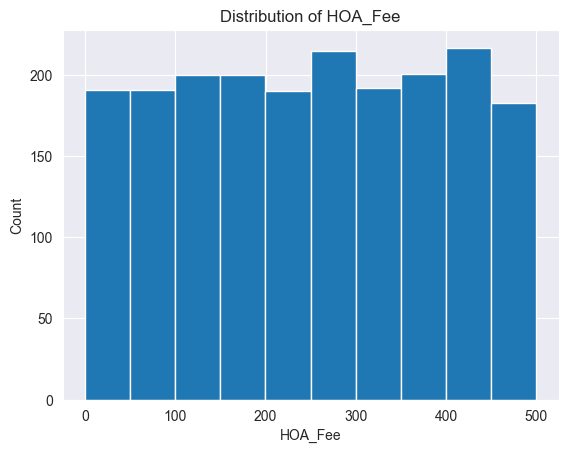

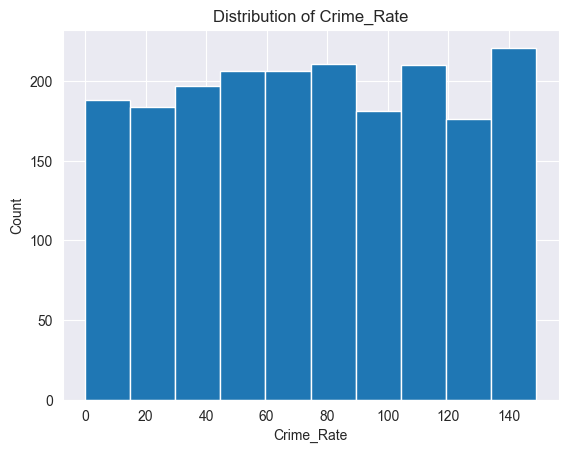

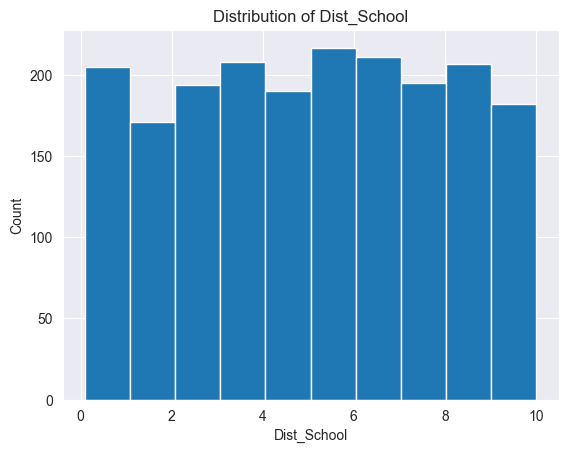

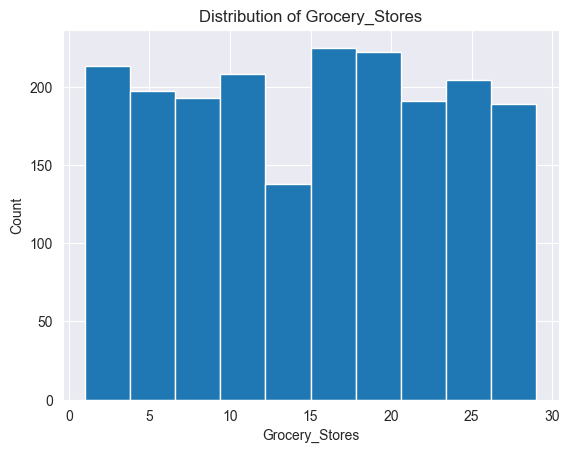

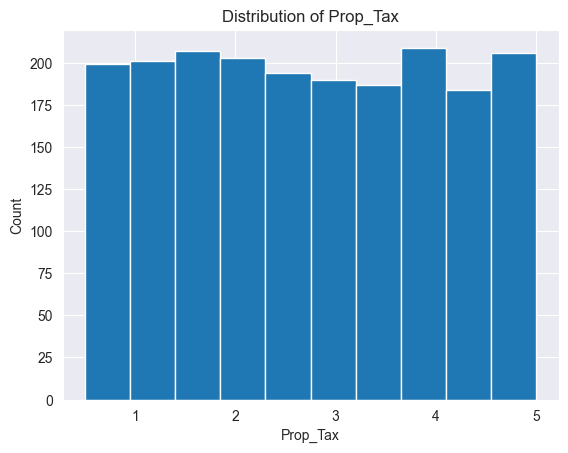

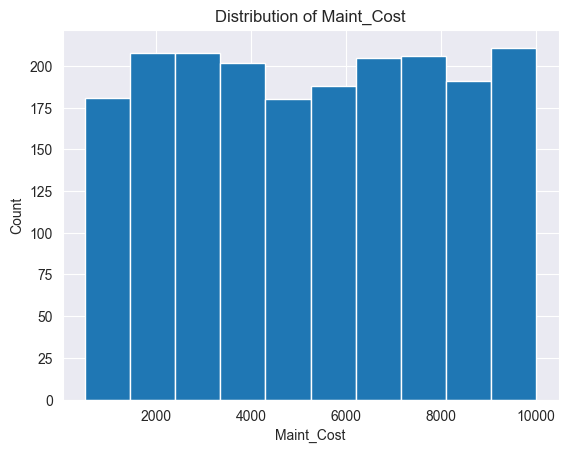

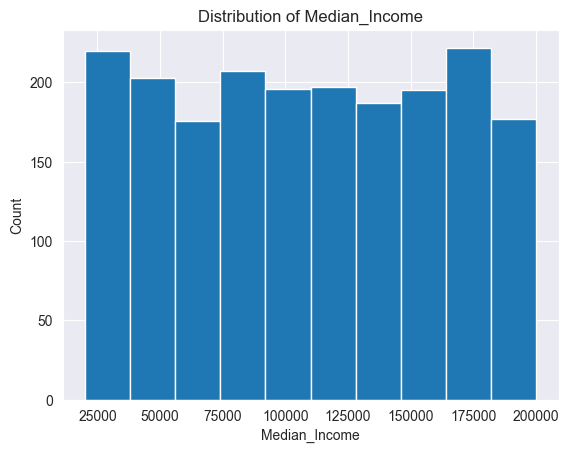

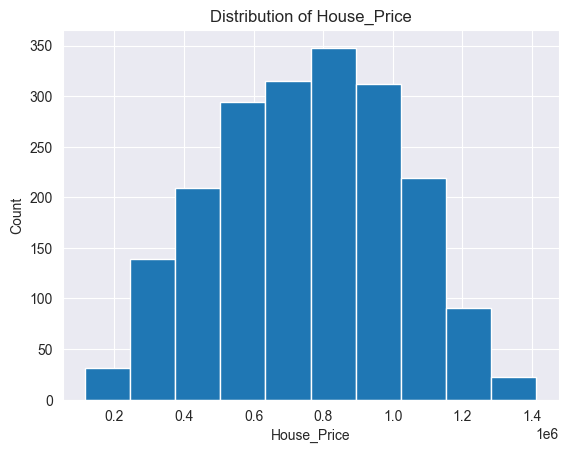

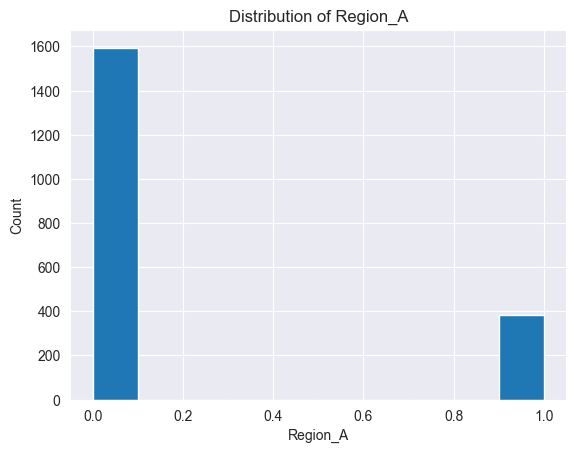

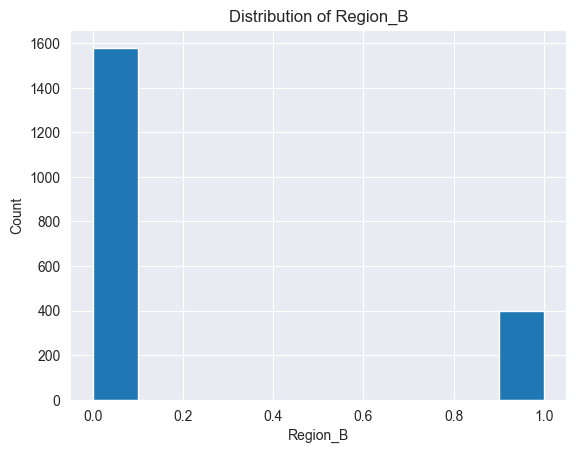

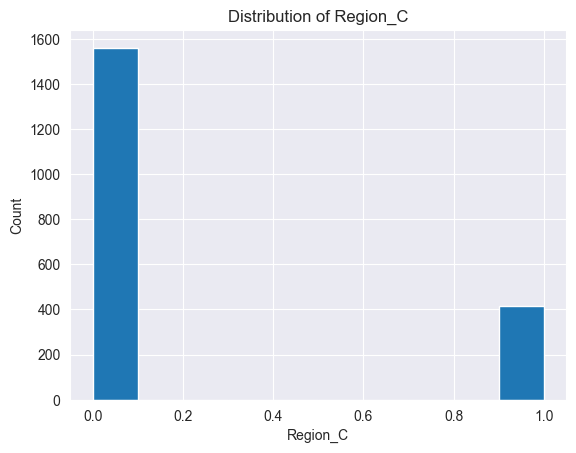

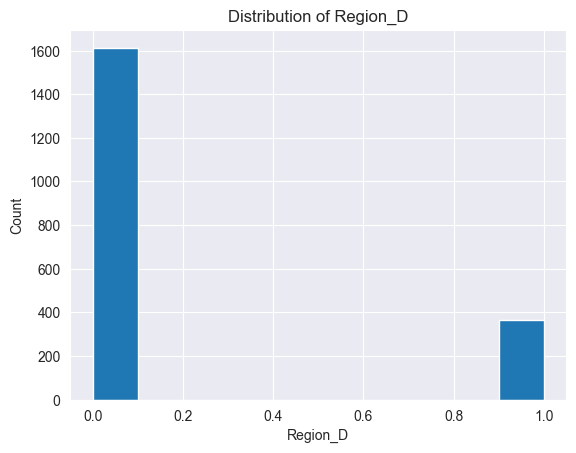

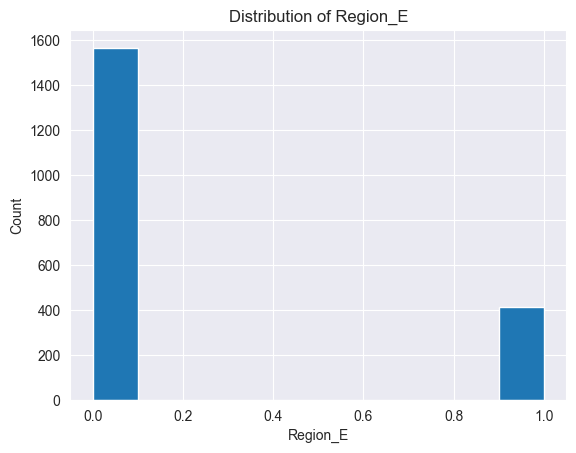

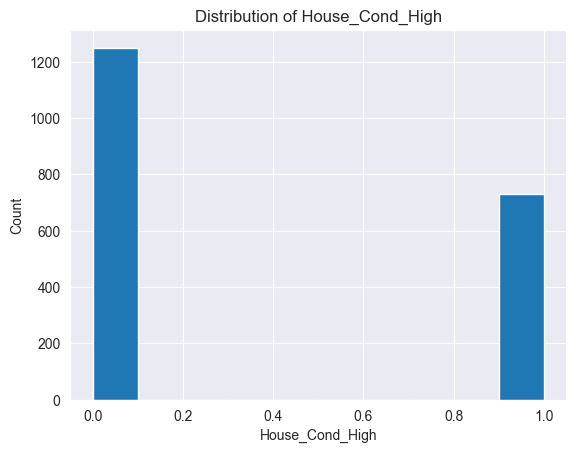

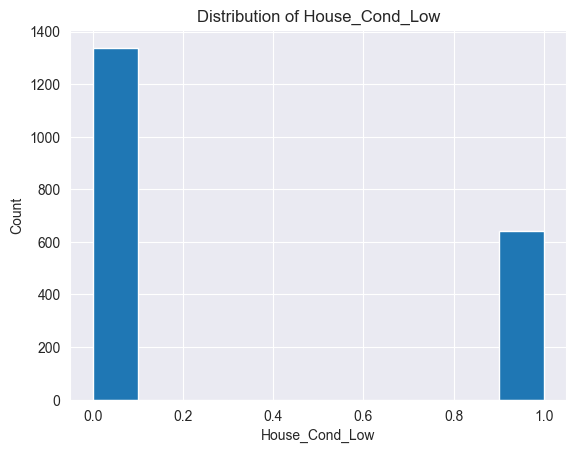

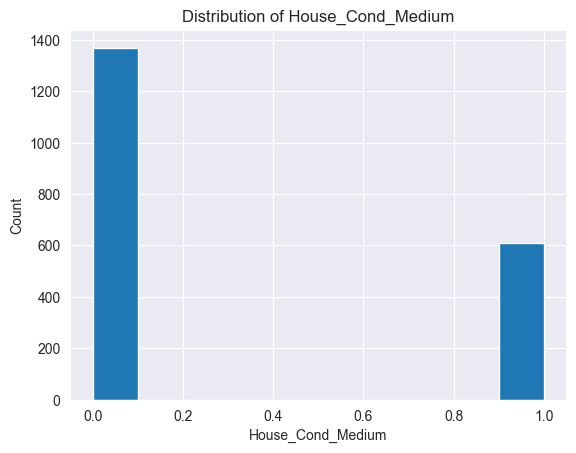

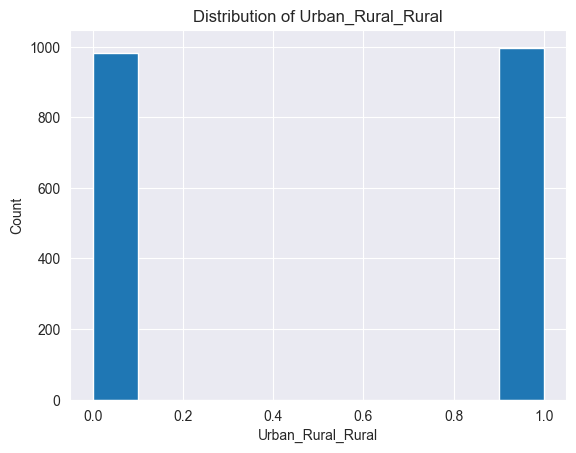

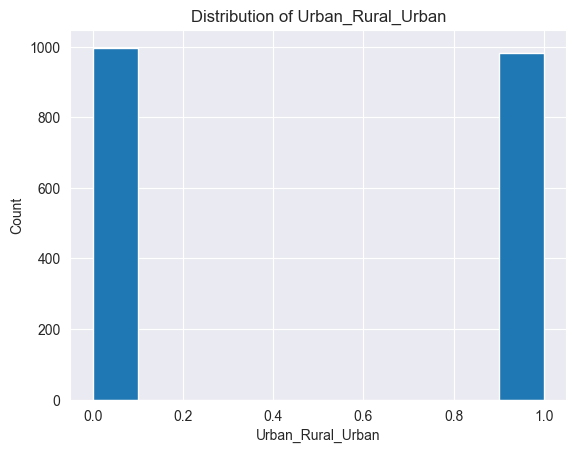

In [389]:
# 4. Visualize the histogram plot of the remaining data.
plot_histograms(df_cleaned, df_cleaned.columns)

**Answer to Discussion Question**: 
1. Outliers are data points that deviate significantly from the rest of a dataset’s distribution.
2. Outliers can occur due to measurement errors, data-entry mistakes, or genuine anomalies in the data.
3. By detecting and analyzing outliers, we can decide to remove, adjust, or keep outliers, and ensure data integrity and optimize model performance.


# Q3 - Correlation and Feature Selection (10 pts)

1. Visualize correlations between features and target using a heatmap to identify highly correlated features.
2. Select numerical features with correlation above two certain thresholds (0.02 and 0.04), and print them.
3. **Discussion Question:** How do you interpret a correlation value? Does a higher correlation always mean a feature is more important?

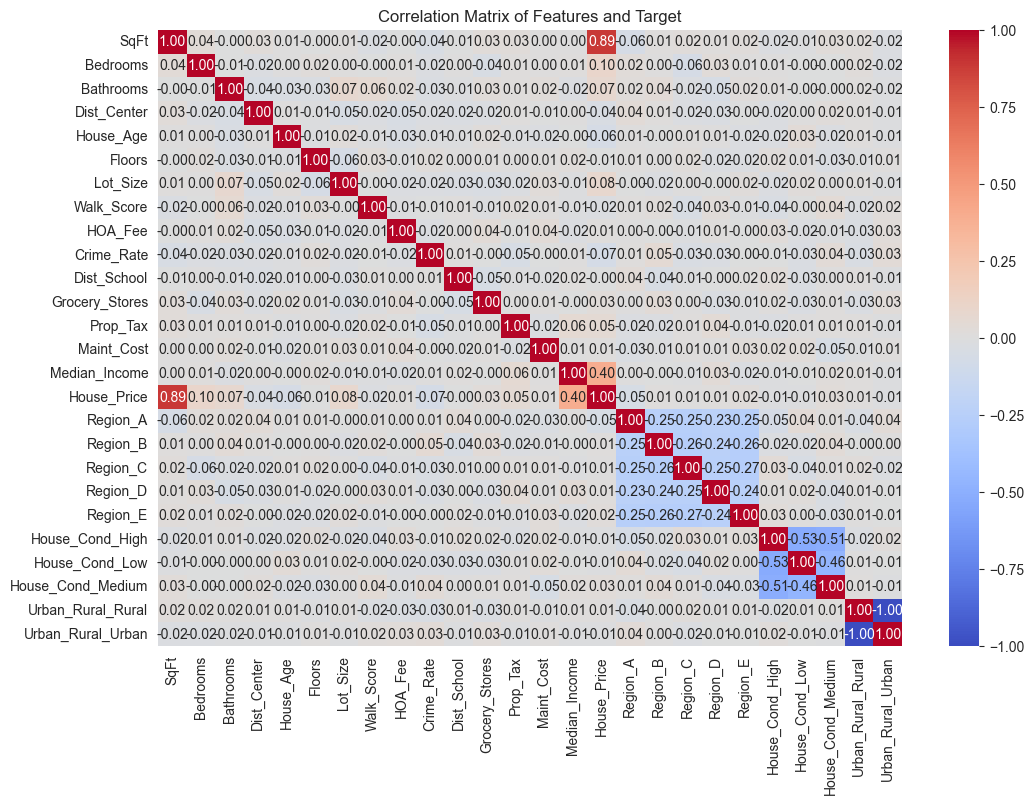

In [390]:
# 1. Visualize correlations between features and target using a heatmap to identify highly correlated features.

# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix of Features and Target')
plt.show()

In [391]:
# 2. Select numerical features with correlation above two certain thresholds (0.02 and 0.04)
high_corr_features_0_02 = correlation_matrix['House_Price'][correlation_matrix['House_Price'].abs() > 0.02].index.tolist()
high_corr_features_0_04 = correlation_matrix['House_Price'][correlation_matrix['House_Price'].abs() > 0.04].index.tolist()

print("Numerical features with correlation > 0.02 with House_Price:", high_corr_features_0_02)
print("Numerical features with correlation > 0.04 with House_Price:", high_corr_features_0_04)

Numerical features with correlation > 0.02 with House_Price: ['SqFt', 'Bedrooms', 'Bathrooms', 'Dist_Center', 'House_Age', 'Lot_Size', 'Crime_Rate', 'Grocery_Stores', 'Prop_Tax', 'Median_Income', 'House_Price', 'Region_A', 'House_Cond_Medium']
Numerical features with correlation > 0.04 with House_Price: ['SqFt', 'Bedrooms', 'Bathrooms', 'House_Age', 'Lot_Size', 'Crime_Rate', 'Prop_Tax', 'Median_Income', 'House_Price', 'Region_A']


**Answer to Discussion Question**: 
***How do you interpret a correlation value?***
1. A correlation value quantifies the degree to which two variables are related.
2. This value ranges from -1 to +1:
3. +1 represents a perfect positive linear relationship, where increases in one variable correspond to increases in the other.
4. -1 represents a perfect negative linear relationship, where increases in one variable correspond to decreases in the other.
5. 0 suggests there is no linear relationship between the variables.

***Does a higher correlation always mean a feature is more important?***
1. No.
2. In linear models such as linear regression or logistic regression, multicollinearity can lead to solutions that vary greatly and may be numerically unstable.
3. Models like Random forests are effective at identifying interactions between various features, the presence of highly correlated features can obscure these interactions.


# Q4 - Multiple Linear Regression (20 pts)

1. Build three different subsets of our data using two different sets of features based on correlation thresholds in previous question, as well as the original dataset with all features. For each subset, split the data into train and test and hold out 30% of observations as the test set. Pass random_state=42 to train_test_split to ensure you get the same train and tests sets as the solution and normalize (z-normalization) the data splits. 
2. Build two different multiple linear regression models using the subsets made by two different thresholds in Q3, and train them on their normalized training sets. 
3. Now build and fit a Lasso Regression model to the training data using all features in the dataset. The penalization parameter is set to 0.5.
4. Evaluate the three models on their test sets and compare the models using R² and RMSE.
5. **Discussion Question:** How do we decide which features to include in a multiple linear regression model? What challenges might arise from using too many features?
6. **Discussion Question:** Among the three models, which model performs the best and why?
7. **Discussion Question:** If a model has a high R² value but a large RMSE, what might that indicate about the model's performance?
8. **Discussion Question:** Discuss next steps for potential improvements to the best performing model.

In [392]:
# 1. Build three different subsets of our data using two different sets of features based on correlation thresholds in previous question, as well as the original dataset with all features. For each subset, split the data into train and test and hold out 30% of observations as the test set. Pass random_state=42 to train_test_split to ensure you get the same train and tests sets as the solution and normalize (z-normalization) the data splits. 

# Subset 1: All features (original dataset)
X_all = df_cleaned.drop(columns=["House_Price"])
y_all = df_cleaned["House_Price"]

# Subset 2: Features with corr > 0.02
subset_0_02 = [col for col in high_corr_features_0_02 if col != "House_Price"]
X_0_02 = df_cleaned[subset_0_02]
y_0_02 = df_cleaned["House_Price"]

# Subset 3: Features with corr > 0.04
subset_0_04 = [col for col in high_corr_features_0_04 if col != "House_Price"]
X_0_04 = df_cleaned[subset_0_04]
y_0_04 = df_cleaned["House_Price"]

In [393]:
# Split each subset into Train and Test and normalize (z-normalization)
TEST_SIZE = 0.30
RANDOM_STATE = 42

# Subset 1: All features (original dataset)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_all, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

scaler_all = StandardScaler()
X_train_all_scaled = scaler_all.fit_transform(X_train_all)
X_test_all_scaled = scaler_all.transform(X_test_all)

# Subset 2: Features with corr > 0.02
X_train_02, X_test_02, y_train_02, y_test_02 = train_test_split(
    X_0_02, y_0_02, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

scaler_02 = StandardScaler()
X_train_02_scaled = scaler_02.fit_transform(X_train_02)
X_test_02_scaled = scaler_02.transform(X_test_02)

# Subset 3: Features with corr > 0.04
X_train_04, X_test_04, y_train_04, y_test_04 = train_test_split(
    X_0_04, y_0_04, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

scaler_04 = StandardScaler()
X_train_04_scaled = scaler_04.fit_transform(X_train_04)
X_test_04_scaled = scaler_04.transform(X_test_04)

In [394]:
# 2. Build two different multiple linear regression models using the subsets made by two different thresholds in Q3, and train them on their normalized training sets. 

# Linear Regression for Subset 2
lr_model_02 = LinearRegression()
lr_model_02.fit(X_train_02_scaled, y_train_02)

# Linear Regression for Subset 3
lr_model_04 = LinearRegression()
lr_model_04.fit(X_train_04_scaled, y_train_04)

LinearRegression()

In [395]:
# 3. Now build and fit a Lasso Regression model to the training data using all features in the dataset. The penalization parameter is set to 0.5.

lasso_model_all = Lasso(alpha=0.5, random_state=RANDOM_STATE)
lasso_model_all.fit(X_train_all_scaled, y_train_all)

Lasso(alpha=0.5, random_state=42)

In [396]:
# 4. Evaluate the three models on their test sets and compare the models using R² and RMSE.
def evaluate_model(model, X_test, y_test, model_name="Model"):
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    print(f"{model_name} Evaluation")
    print(f"R^2:  {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print()

# Evaluate Linear Regression (corr > 0.02)
evaluate_model(lr_model_02, X_test_02_scaled, y_test_02, 
               model_name="Linear Regression (corr > 0.02)")

# Evaluate Linear Regression (corr > 0.04)
evaluate_model(lr_model_04, X_test_04_scaled, y_test_04, 
               model_name="Linear Regression (corr > 0.04)")

# Evaluate Lasso Regression (all features)
evaluate_model(lasso_model_all, X_test_all_scaled, y_test_all, 
               model_name="Lasso Regression (all features, alpha=0.5)")

Linear Regression (corr > 0.02) Evaluation
R^2:  0.9576
RMSE: 54409.0564

Linear Regression (corr > 0.04) Evaluation
R^2:  0.9550
RMSE: 56020.2818

Lasso Regression (all features, alpha=0.5) Evaluation
R^2:  0.9577
RMSE: 54355.6510


D:\Environments\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\Environments\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\Environments\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Answer to the first Discussion Question**: 

**Answer to the socond Discussion Question**: 
***6. Among the three models, which model performs the best and why?***
Lasso Regression performs best as it has the highest R² (0.9577) and lowest RMSE (54,355.6510).

**Answer to the third Discussion Question**: 
***7. If a model has a high R² value but a large RMSE, what might that indicate about the model's performance?***
1. A high R² means the model can explain most of the variance in the target.
2. A large RMSE means the model captures overall trends, but individual predictions varies from the actual value suggests there may have some outliers or the scale of target variable is large.

**Answer to the fourth Discussion Question**: 
***8. Discuss next steps for potential improvements to the best performing model.***
1. We can conduct some feature engineering.
2. Use K-fold cross-validation.
3. Hyperparameter tuning.

# Q 5 - Data Loading and Classification (25 pts)

1. Load the Dataset2.
2. Display basic statistics and inspect for missing data.
3. Encode the categorical features (one-hot encoding). 
4. Split the data into train, validation and test and hold out 20% and 10% of observations as the validation and test set, respectively. Pass random_state=42.
5. Normalize the data (Z-normalization) and fit the following models to the training samples:
- Logistic Regression
- K-Nearest Neighbors (KNN) with K equals to 3
- Random Forest (RF) that consists of 5 base decision trees with the maximum depth of 5
- Single-Layer Neural Network (Perceptron) with stochastic gradient descent (SGD) optimizer and a learning rate of 0.1, run the model for 10 iterations/epochs.

6. Report the training time in milli second for all models. 

7. Use the Random Forest model you built to generate feature importance scores and a horizontal bar chart to plot the importance scores of all features in descending order. 

8. Select the important features from most to least important until the accumulated relative importance score reaches 90% or 0.9 and print out the selected features with their importance scores

In [397]:
# 1. Load the Dataset2.
data = pd.read_csv('Dataset2.csv')
df = pd.DataFrame(data)

In [398]:
# 2. Display basic statistics and inspect for missing data.
df.describe()

,Credit_Score,Income,Loan_Amount,Loan_Term,Debt_Income,Open_Accounts,Hist_Length,Delinquencies,Total_Loan_Balance,Credit_Inquiries,Employer_Tenure,LTV_Ratio,Loan_Status
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,565.803333,11086.805000,255226.050833,108.690000,29.386667,7.382500,20.213333,4.617500,521488.707500,7.156667,19.361667,69.413333,0.696667
std,160.628939,5228.355222,141710.633445,94.601807,11.256898,4.043078,11.413649,2.962292,287278.306128,4.249373,11.387519,17.426098,0.787510
min,300.000000,2011.000000,5138.000000,12.000000,10.000000,1.000000,1.000000,0.000000,1037.000000,0.000000,0.000000,40.000000,0.000000
25%,426.750000,6710.500000,136795.000000,48.000000,20.000000,4.000000,10.000000,2.000000,283009.250000,3.750000,10.000000,55.000000,0.000000
50%,558.000000,11168.500000,253737.000000,72.000000,29.000000,7.000000,20.000000,5.000000,526166.000000,7.000000,19.000000,69.000000,0.000000
75%,702.000000,15614.250000,373255.500000,120.000000,39.000000,11.000000,30.000000,7.000000,768970.000000,11.000000,29.000000,85.000000,1.000000
max,849.000000,19961.000000,499178.000000,360.000000,49.000000,14.000000,39.000000,9.000000,998714.000000,14.000000,39.000000,99.000000,2.000000


In [399]:
df.head()

,Credit_Score,Income,Loan_Amount,Loan_Term,Debt_Income,Open_Accounts,Hist_Length,Delinquencies,Total_Loan_Balance,Credit_Inquiries,Employer_Tenure,LTV_Ratio,Loan_Purpose,Employment_Type,Loan_Status
0,402,15913,373252,84,20,11,4,3,1037,11,15,56,Medical,Government,1
1,735,11105,356853,84,33,2,38,5,699392,0,14,50,Auto,Government,2
2,570,10228,322013,84,30,4,25,8,472449,2,22,59,Home Improvement,Government,0
3,406,11903,394032,180,11,7,5,0,304564,12,11,49,Auto,Government,1
4,371,5020,68095,96,49,8,30,0,508450,7,28,68,Small Business,Unemployed,2


In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Credit_Score        1200 non-null   int64 
 1   Income              1200 non-null   int64 
 2   Loan_Amount         1200 non-null   int64 
 3   Loan_Term           1200 non-null   int64 
 4   Debt_Income         1200 non-null   int64 
 5   Open_Accounts       1200 non-null   int64 
 6   Hist_Length         1200 non-null   int64 
 7   Delinquencies       1200 non-null   int64 
 8   Total_Loan_Balance  1200 non-null   int64 
 9   Credit_Inquiries    1200 non-null   int64 
 10  Employer_Tenure     1200 non-null   int64 
 11  LTV_Ratio           1200 non-null   int64 
 12  Loan_Purpose        1200 non-null   object
 13  Employment_Type     1200 non-null   object
 14  Loan_Status         1200 non-null   int64 
dtypes: int64(13), object(2)
memory usage: 140.8+ KB


In [401]:
df.isnull().sum()

Credit_Score          0
Income                0
Loan_Amount           0
Loan_Term             0
Debt_Income           0
Open_Accounts         0
Hist_Length           0
Delinquencies         0
Total_Loan_Balance    0
Credit_Inquiries      0
Employer_Tenure       0
LTV_Ratio             0
Loan_Purpose          0
Employment_Type       0
Loan_Status           0
dtype: int64

In [402]:
# 3. Encode the categorical features (one-hot encoding). 
categorical_cols = ['Loan_Purpose', 'Employment_Type']
encoder = OneHotEncoder(sparse_output=False)

encoded_array = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and merge
df_encoded = df.drop(columns=categorical_cols).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Credit_Score                     1200 non-null   int64  
 1   Income                           1200 non-null   int64  
 2   Loan_Amount                      1200 non-null   int64  
 3   Loan_Term                        1200 non-null   int64  
 4   Debt_Income                      1200 non-null   int64  
 5   Open_Accounts                    1200 non-null   int64  
 6   Hist_Length                      1200 non-null   int64  
 7   Delinquencies                    1200 non-null   int64  
 8   Total_Loan_Balance               1200 non-null   int64  
 9   Credit_Inquiries                 1200 non-null   int64  
 10  Employer_Tenure                  1200 non-null   int64  
 11  LTV_Ratio                        1200 non-null   int64  
 12  Loan_Status         

In [403]:
# 4. Split the data into train, validation and test and hold out 20% and 10% of observations as the validation and test set, respectively. Pass random_state=42.
target_col = "Loan_Status"

X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

# 10% for the test set
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42
)

# 20% for the validation set
# 70% for the test set
# 0.20 / 0.90 ≈ 0.2222
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2222, random_state=42
)

print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (840, 22) (840,)
Validation set shape: (240, 22) (240,)
Test set shape: (120, 22) (120,)


In [404]:
# Z-normalize (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

model_training_times = {}

In [405]:
# Logistic Regression
start_time = time.time()
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
end_time = time.time()
model_training_times['Logistic Regression'] = (end_time - start_time) * 1000

In [406]:
# KNN (k=3)
start_time = time.time()
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)
end_time = time.time()
model_training_times['KNN (k=3)'] = (end_time - start_time) * 1000

In [407]:
# Random Forest (5 trees, max_depth=5)
start_time = time.time()
rf_model = RandomForestClassifier(
    n_estimators=5, max_depth=5, random_state=42
)
rf_model.fit(X_train_scaled, y_train)
end_time = time.time()
model_training_times['Random Forest'] = (end_time - start_time) * 1000

In [408]:
# Single-Layer Neural Network (Perceptron) with SGD (learning_rate=0.1, 10 epochs)
start_time = time.time()
nn_model = Perceptron(
    eta0=0.1,
    max_iter=10, 
    tol=None,
    random_state=42
)
nn_model.fit(X_train_scaled, y_train)
end_time = time.time()
model_training_times['Single-Layer NN (Perceptron)'] = (end_time - start_time) * 1000

In [409]:
print("\n--- Validation Accuracy ---")
print("Logistic Regression :", accuracy_score(y_val, lr_model.predict(X_val_scaled)))
print("KNN (k=3)           :", accuracy_score(y_val, knn_model.predict(X_val_scaled)))
print("Random Forest       :", accuracy_score(y_val, rf_model.predict(X_val_scaled)))
print("Perceptron          :", accuracy_score(y_val, nn_model.predict(X_val_scaled)))


--- Validation Accuracy ---
Logistic Regression : 0.4666666666666667
KNN (k=3)           : 0.4375
Random Forest       : 0.44166666666666665
Perceptron          : 0.375


In [410]:
# 6. Report the training time (in milliseconds) for all models
print("\n--- Model Training Times (ms) ---")
for model_name, train_time in model_training_times.items():
    print(f"{model_name}: {train_time:.2f} ms")


--- Model Training Times (ms) ---
Logistic Regression: 4.77 ms
KNN (k=3): 1.11 ms
Random Forest: 10.11 ms
Single-Layer NN (Perceptron): 2.13 ms


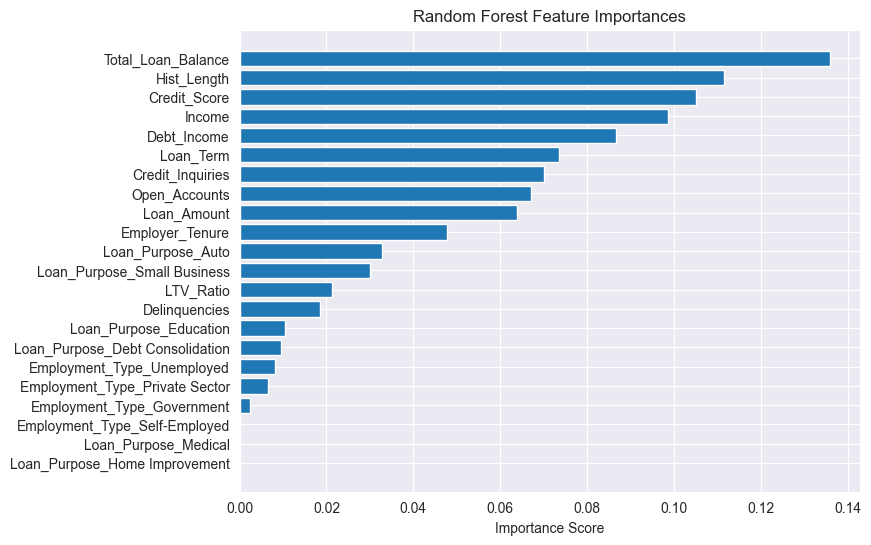

In [411]:
# 7. Use the Random Forest model you built to generate feature importance scores and a horizontal bar chart to plot the importance scores of all features in descending order. 
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort importances descending
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx])
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel("Importance Score")
plt.title("Random Forest Feature Importances")
plt.show()

In [412]:
# 8. Select the important features from most to least important until the accumulated relative importance score reaches 90% or 0.9 and print out the selected features with their importance scores
accumulated_importance = 0.0
total_importance = np.sum(importances)
selected_features = []

for idx in sorted_idx:
    selected_features.append((feature_names[idx], importances[idx]))
    accumulated_importance += importances[idx]
    if accumulated_importance / total_importance >= 0.90:
        break

print("\nSelected features until 90% importance reached:")
for feat_name, feat_imp in selected_features:
    print(f"{feat_name}: {feat_imp:.4f}")


Selected features until 90% importance reached:
Total_Loan_Balance: 0.1360
Hist_Length: 0.1115
Credit_Score: 0.1050
Income: 0.0986
Debt_Income: 0.0866
Loan_Term: 0.0736
Credit_Inquiries: 0.0701
Open_Accounts: 0.0672
Loan_Amount: 0.0639
Employer_Tenure: 0.0476
Loan_Purpose_Auto: 0.0329
Loan_Purpose_Small Business: 0.0300


# Q 6 - Model Selection (10 pts)

1. Report the prediction results of all models in Q5 on the test set of Dataset2, using these evaluation metrics: Confusion matrix, F1-score, Recall, Precision and Accuracy. 
2. Plot the ROC curve and report AUC of the predictions on the test set.
3. Report the test time (in millisecond) for all models. 
4. **Discussion Question:** Why is AUC-ROC a better metric than accuracy for this datasets? Provide an example where accuracy can be misleading.
5. **Discussion Question:** Among all models, which one you would choose? why? 

In [413]:
# 1. Report prediction results on test set: Confusion matrix, F1-score, Recall, Precision, Accuracy

def evaluate_classification_model(model, X_test, y_test, model_name="Model"):
    # Get predictions
    y_pred = model.predict(X_test)
    
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    else:
        # For models lacking 'predict_proba', use decision_function or approximate
        # For a strict example, let's just set it to None
        y_pred_prob = None

    # Calculate metrics
    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)

    # Print or store the results
    print(f"--- {model_name} Evaluation on Test Set ---")
    print("Confusion Matrix:\n", cm)
    print(f"F1-score:   {f1:.4f}")
    print(f"Recall:     {recall:.4f}")
    print(f"Precision:  {precision:.4f}")
    print(f"Accuracy:   {accuracy:.4f}\n")
    
    return {
        "y_pred": y_pred,
        "y_pred_prob": y_pred_prob,
        "f1_score": f1,
        "recall": recall,
        "precision": precision,
        "accuracy": accuracy
    }

In [414]:
# Evaluate all models on the test set
results = {}
results["LogisticRegression"] = evaluate_classification_model(lr_model, X_test_scaled, y_test, "Logistic Regression")
results["KNN"]                = evaluate_classification_model(knn_model, X_test_scaled, y_test, "KNN (k=3)")
results["RandomForest"]       = evaluate_classification_model(rf_model, X_test_scaled, y_test, "Random Forest")
results["Perceptron"]         = evaluate_classification_model(nn_model, X_test_scaled, y_test, "Single-Layer NN (Perceptron)")

--- Logistic Regression Evaluation on Test Set ---
Confusion Matrix:
 [[64  1  0]
 [29  2  0]
 [24  0  0]]
F1-score:   0.2736
Recall:     0.3497
Precision:  0.4046
Accuracy:   0.5500

--- KNN (k=3) Evaluation on Test Set ---
Confusion Matrix:
 [[48  9  8]
 [21  8  2]
 [17  4  3]]
F1-score:   0.3685
Recall:     0.3738
Precision:  0.3900
Accuracy:   0.4917

--- Random Forest Evaluation on Test Set ---
Confusion Matrix:
 [[62  3  0]
 [28  2  1]
 [21  3  0]]
F1-score:   0.2690
Recall:     0.3395
Precision:  0.2695
Accuracy:   0.5333

--- Single-Layer NN (Perceptron) Evaluation on Test Set ---
Confusion Matrix:
 [[34 21 10]
 [15  7  9]
 [14  4  6]]
F1-score:   0.3328
Recall:     0.3330
Precision:  0.3328
Accuracy:   0.3917


Perceptron does not support predict_proba; skipping.


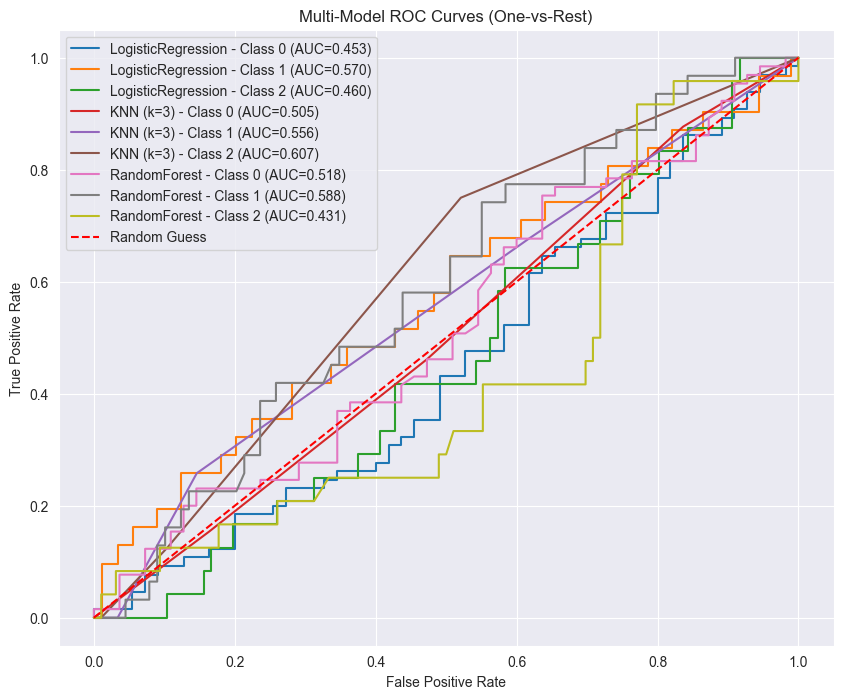

In [415]:
# 2. Plot the ROC curve and report AUC for each model on the test set
models = {
    "LogisticRegression": lr_model,
    "KNN (k=3)": knn_model,
    "RandomForest": rf_model,
    "Perceptron": nn_model
}

classes = [0, 1, 2]
y_test_binarized = label_binarize(y_test, classes=classes)

plt.figure(figsize=(10,8))

for model_name, model_obj in models.items():
    if hasattr(model_obj, "predict_proba"):
        y_score = model_obj.predict_proba(X_test_scaled)
        
        macro_roc_auc = roc_auc_score(
            y_test_binarized, y_score, multi_class="ovr", average="macro"
        )
        micro_roc_auc = roc_auc_score(
            y_test_binarized, y_score, multi_class="ovr", average="micro"
        )

        for i, class_label in enumerate(classes):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
            auc_val = roc_auc_score(y_test_binarized[:, i], y_score[:, i])
            plt.plot(
                fpr, tpr, 
                label=f"{model_name} - Class {class_label} (AUC={auc_val:.3f})"
            )
        
    else:
        print(f"{model_name} does not support predict_proba; skipping.")

plt.plot([0,1], [0,1], 'r--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Model ROC Curves (One-vs-Rest)")
plt.legend()
plt.show()

In [416]:
# 3. Report test time (in milliseconds) for each model
test_times = {}

for model_name, model in zip(
    ["LogisticRegression", "KNN (k=3)", "RandomForest", "Perceptron"], 
    [lr_model, knn_model, rf_model, nn_model]
):
    start_test_time = time.time()
    _ = model.predict(X_test_scaled)
    end_test_time = time.time()
    test_times[model_name] = (end_test_time - start_test_time) * 1000

print("\n--- Model Test Times (ms) ---")
for model_name, t_time in test_times.items():
    print(f"{model_name}: {t_time:.2f} ms")


--- Model Test Times (ms) ---
LogisticRegression: 0.00 ms
KNN (k=3): 12.28 ms
RandomForest: 0.00 ms
Perceptron: 0.00 ms


**Answer to the first Discussion Question:** 
1. Accuracy can be misleading if one class is significantly more frequent. 
2. For example, a dataset where 90% of loans are “Fully Approved,” 5% are “Conditionally Approved,” and 5% are “Rejected.” A trivial model predicting “Fully Approved” for every case would achieve 90% accuracy yet fail completely to identify the other classes.
3. AUC-ROC captures ranking quality across all possible classification thresholds.

**Answer to the second Discussion Question:** 
1. KNN has the highest overall AUC
2. Also, KNN have the highest F1‐score (0.37) and highest recall (0.37), with a slightly lower accuracy.
3. In a loan approval scenario, misclassifying an applicant can be costly.
4. Although KNN is costly in terms of prediction, and it can be extremely slow with big data, but in this scenario which doesn't need real-time output it will be fine.

# Q 7 - Model Selection (20 pts)

1. Build a Multi-Layer Perceptron (MLP) and fit it to the normalized training set of Dataset2- The details of the MLP are as follows:
   * Two hidden layers (H1, H2), with 50 and 100 neurons/units in H1 and H2, respectively. 
   * Use tanh function as the activation function for hidden layers.
   * Use a proper acitivation function for the output layer.  
   * Use Stochastic gradient descent optimizer with a learning rate of 0.1.
   * Run the model for 10 iterations/epochs 
   
2.  Report the training time in milli second
3.  Record the validation and training loss for each iteration, and make the plot of learning curves (iterations/epochs vs loss).
4.  Report the prediction results of MLP on the test set of Dataset2, using these evaluation metrics: Confusion matrix, F1-score, Recall, Precision and Accuracy.
5.  Report the test time (in milli second) for MLP. 
6.  **Analytical Question:** Do you see any signes of overfitting? Why? If it overfits, how would you fix this issue?

In [417]:
# Create the MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 100),
    activation='tanh',  
    solver='sgd',
    learning_rate_init=0.1,
    max_iter=1,
    warm_start=True,
    random_state=42
)

In [418]:
classes_for_partial_fit = np.unique(y_train)

train_losses = []
val_losses = []

In [419]:
# Measure training time
start_train = time.time()
for epoch in range(10):  # 10 epochs
    # partial_fit will train for exactly 1 pass over the training data
    mlp.partial_fit(X_train_scaled, y_train, classes=classes_for_partial_fit)
    
    # Training loss after this epoch
    train_loss = mlp.loss_
    
    # Validation loss requires predicted probabilities on X_val
    y_val_proba = mlp.predict_proba(X_val_scaled)
    val_loss = log_loss(y_val, y_val_proba)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)

end_train = time.time()
model_training_times['MLP'] = (end_train - start_train) * 1000  # in ms

print(f"MLP Training Completed in {model_training_times['MLP']:.2f} ms")

MLP Training Completed in 75.96 ms


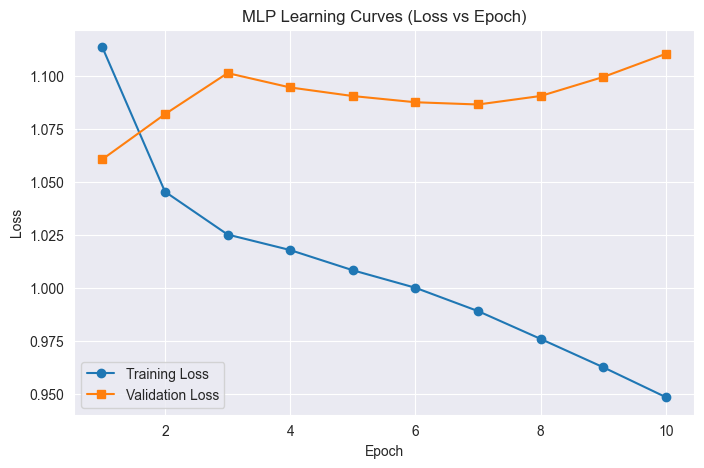

In [420]:
# 3. Plot learning curves
epochs = range(1, 11)
plt.figure(figsize=(8,5))
plt.plot(epochs, train_losses, label="Training Loss", marker='o')
plt.plot(epochs, val_losses,   label="Validation Loss", marker='s')
plt.title("MLP Learning Curves (Loss vs Epoch)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [421]:
# 4. Report the prediction results of MLP on the test set of Dataset2, using these evaluation metrics: Confusion matrix, F1-score, Recall, Precision and Accuracy.
def evaluate_mlp(model, X_test, y_test, model_name="MLP"):
    y_pred = model.predict(X_test)
    
    f1       = f1_score(y_test, y_pred, average='macro', zero_division=0)
    recall   = recall_score(y_test, y_pred, average='macro', zero_division=0)
    precision= precision_score(y_test, y_pred, average='macro', zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    cm       = confusion_matrix(y_test, y_pred)

    print(f"\n--- {model_name} Evaluation on Test Set ---")
    print("Confusion Matrix:\n", cm)
    print(f"F1-score (macro):  {f1:.4f}")
    print(f"Recall (macro):    {recall:.4f}")
    print(f"Precision (macro): {precision:.4f}")
    print(f"Accuracy:          {accuracy:.4f}")

    return (f1, recall, precision, accuracy, cm)

start_test = time.time()
mlp_eval = evaluate_mlp(mlp, X_test_scaled, y_test, "Multi-Layer Perceptron")


--- Multi-Layer Perceptron Evaluation on Test Set ---
Confusion Matrix:
 [[52 10  3]
 [21  8  2]
 [21  2  1]]
F1-score (macro):  0.3448
Recall (macro):    0.3666
Precision (macro): 0.3733
Accuracy:          0.5083


In [422]:
# 5. Report test time
# Measure test inference time
end_test = time.time()
mlp_test_time_ms = (end_test - start_test) * 1000
print(f"MLP Inference Time on Test Set: {mlp_test_time_ms:.2f} ms")

MLP Inference Time on Test Set: 9.26 ms


**Answer to Discussion Question:**
1. No, in the graph training loss shows a consistent decrease.
2. And the validation loss initially increases but then stabilizes and roughly follows the trend of the training loss, although at a slightly higher loss value.
3. If the model overfits, we can use methods like Regularization, Early Stopping, Dropout to prevent overfitting.
